# Analysis of random player games

In this notebook, we analyse the game play of the random player, properties of the game itself, and ...

In [11]:
from src.game import Mathematico, Arena
from src.random_player import RandomPlayer

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Set-seed game scores

First we analyse the distribution of achievable scores of the one game, using the randon play-out.

In [4]:
random_player = RandomPlayer()
arena = Arena()
arena.add_player(random_player)

We simulate the same game, 10.000 times and plot the distribution and characteristics of the achieved scores.

In [7]:
scores = arena.run(seed=0, steps=10_000)[0]
scores_data = pd.DataFrame(data={"score": scores})

Steps run: 10000	Elapsed time: 16.882859230041504


In [8]:
scores_data.describe()

,score
count,10000.000000
mean,83.921000
std,31.152413
min,0.000000
25%,60.000000
50%,80.000000
75%,100.000000
max,370.000000


As can be seen, the average random score is about 84 points, with the maximum being around 400 points, and the minimum 0 points.

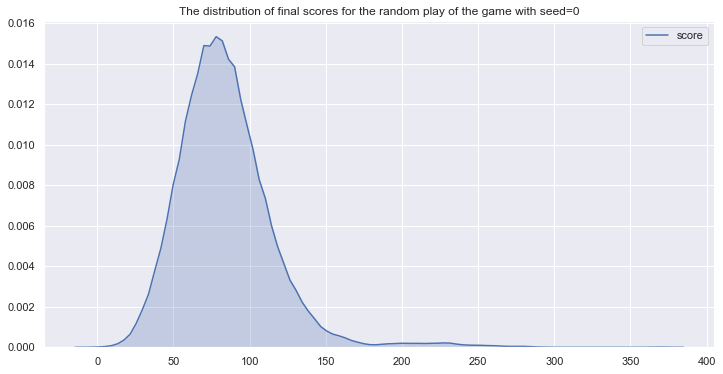

In [25]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=scores_data.score, shade=True)
plt.title("The distribution of final scores for the random play of the game with seed=0");

Therefore we conclude, the single game outcome with the random play has normal distribution with mean 84 and variance 31.

### Set-seed random player

Now we will analyse the game play of the same random agent, on the different games.

In [27]:
random_player = RandomPlayer(seed=42)
arena = Arena()
arena.add_player(random_player)
scores = arena.run(steps=10_000)[0]

Steps run: 10000	Elapsed time: 15.020841121673584


In [28]:
scores_data = pd.DataFrame(data={"score": scores})
scores_data.describe()

,score
count,10000.000000
mean,86.939000
std,32.382791
min,0.000000
25%,70.000000
50%,80.000000
75%,100.000000
max,310.000000


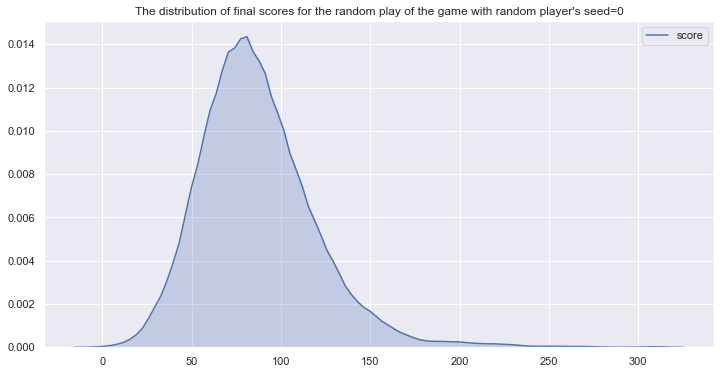

In [30]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=scores_data.score, shade=True)
plt.title("The distribution of final scores for the random play of the game with random player's seed=0");

Again, the distribution conforms the normal distribution with mean ~87 and variance 32.

### Random player play

Finally, we analyse the random play of the 100 different agents, and different games, to obtain same volume of data.

In [31]:
arena = Arena()
for i in range(100):
    arena.add_player(RandomPlayer(seed=i))
results = arena.run(steps=10_000 // 100)

Steps run: 100	Elapsed time: 13.812110424041748


In [35]:
from itertools import chain

scores_data = pd.DataFrame(data={"score": chain.from_iterable(results)})
scores_data.describe()

,score
count,10000.000000
mean,87.332000
std,32.015063
min,0.000000
25%,70.000000
50%,80.000000
75%,100.000000
max,290.000000


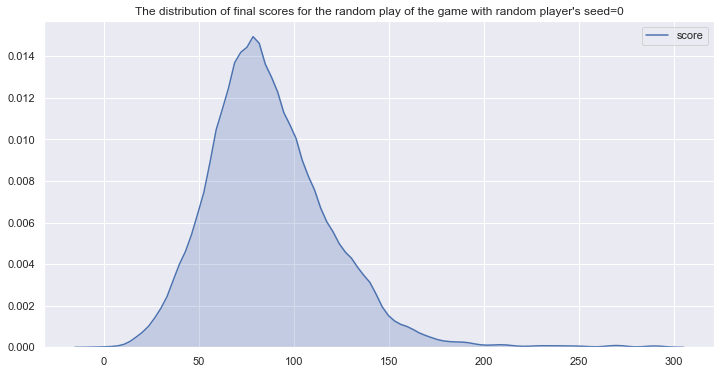

In [36]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=scores_data.score, shade=True)
plt.title("The distribution of final scores for the random play of the game with random player's seed=0");